In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt

/Users/icchy/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib inline

In [3]:
import os, cv2, random
import numpy as np
import pandas as pd

In [4]:
from matplotlib import ticker
import seaborn as sns

In [5]:
TRAIN_DIR = "./dogscats/train/"
TEST_DIR = "./dogscats/test/"

In [6]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [7]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [8]:
train_images

['./dogscats/train/dog.8011.jpg',
 './dogscats/train/cat.5077.jpg',
 './dogscats/train/dog.7322.jpg',
 './dogscats/train/cat.2718.jpg',
 './dogscats/train/cat.10151.jpg',
 './dogscats/train/cat.3406.jpg',
 './dogscats/train/dog.1753.jpg',
 './dogscats/train/cat.4369.jpg',
 './dogscats/train/cat.7660.jpg',
 './dogscats/train/dog.5535.jpg',
 './dogscats/train/cat.8553.jpg',
 './dogscats/train/cat.9895.jpg',
 './dogscats/train/cat.1211.jpg',
 './dogscats/train/dog.3144.jpg',
 './dogscats/train/dog.775.jpg',
 './dogscats/train/dog.11102.jpg',
 './dogscats/train/cat.6218.jpg',
 './dogscats/train/dog.11664.jpg',
 './dogscats/train/dog.3622.jpg',
 './dogscats/train/cat.1577.jpg',
 './dogscats/train/cat.12020.jpg',
 './dogscats/train/dog.5253.jpg',
 './dogscats/train/cat.7106.jpg',
 './dogscats/train/cat.8235.jpg',
 './dogscats/train/cat.952.jpg',
 './dogscats/train/dog.9469.jpg',
 './dogscats/train/dog.1035.jpg',
 './dogscats/train/cat.3360.jpg',
 './dogscats/train/cat.11529.jpg',
 './dogscat

In [9]:
train_dogs = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

In [10]:
len(train_dogs)

12500

In [11]:
len(train_cats)

12500

In [12]:
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [13]:
test_images

['./dogscats/test/9733.jpg',
 './dogscats/test/63.jpg',
 './dogscats/test/6400.jpg',
 './dogscats/test/823.jpg',
 './dogscats/test/4217.jpg',
 './dogscats/test/3578.jpg',
 './dogscats/test/10321.jpg',
 './dogscats/test/2666.jpg',
 './dogscats/test/5109.jpg',
 './dogscats/test/11981.jpg',
 './dogscats/test/10447.jpg',
 './dogscats/test/2100.jpg',
 './dogscats/test/11759.jpg',
 './dogscats/test/4571.jpg',
 './dogscats/test/7078.jpg',
 './dogscats/test/12250.jpg',
 './dogscats/test/1409.jpg',
 './dogscats/test/9055.jpg',
 './dogscats/test/6366.jpg',
 './dogscats/test/12244.jpg',
 './dogscats/test/189.jpg',
 './dogscats/test/9041.jpg',
 './dogscats/test/6372.jpg',
 './dogscats/test/11995.jpg',
 './dogscats/test/10453.jpg',
 './dogscats/test/2114.jpg',
 './dogscats/test/4565.jpg',
 './dogscats/test/4203.jpg',
 './dogscats/test/10335.jpg',
 './dogscats/test/2672.jpg',
 './dogscats/test/9727.jpg',
 './dogscats/test/6414.jpg',
 './dogscats/test/77.jpg',
 './dogscats/test/8439.jpg',
 './dogscat

In [14]:
train_images = train_dogs[:1000] + train_cats[:1000]
len(train_images)

2000

In [15]:
random.shuffle(train_images)
train_images

['./dogscats/train/dog.12350.jpg',
 './dogscats/train/dog.7900.jpg',
 './dogscats/train/cat.5705.jpg',
 './dogscats/train/cat.10226.jpg',
 './dogscats/train/cat.7273.jpg',
 './dogscats/train/cat.6392.jpg',
 './dogscats/train/cat.9062.jpg',
 './dogscats/train/dog.7451.jpg',
 './dogscats/train/dog.4364.jpg',
 './dogscats/train/dog.1236.jpg',
 './dogscats/train/dog.10432.jpg',
 './dogscats/train/dog.10220.jpg',
 './dogscats/train/dog.6995.jpg',
 './dogscats/train/cat.6966.jpg',
 './dogscats/train/cat.6556.jpg',
 './dogscats/train/dog.7875.jpg',
 './dogscats/train/dog.3178.jpg',
 './dogscats/train/dog.9125.jpg',
 './dogscats/train/cat.5316.jpg',
 './dogscats/train/cat.5102.jpg',
 './dogscats/train/dog.8159.jpg',
 './dogscats/train/dog.4171.jpg',
 './dogscats/train/cat.371.jpg',
 './dogscats/train/dog.10341.jpg',
 './dogscats/train/cat.7112.jpg',
 './dogscats/train/cat.8340.jpg',
 './dogscats/train/dog.3233.jpg',
 './dogscats/train/dog.11472.jpg',
 './dogscats/train/dog.8762.jpg',
 './dogsc

In [16]:
test_images = test_images[:25]
len(test_images)

25

In [17]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [18]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i % 100 == 0 : print("proccessed {} of {}.".format(i, count))

    return data

In [19]:
train = prep_data(train_images)

proccessed 0 of 2000.
proccessed 100 of 2000.
proccessed 200 of 2000.
proccessed 300 of 2000.
proccessed 400 of 2000.
proccessed 500 of 2000.
proccessed 600 of 2000.
proccessed 700 of 2000.
proccessed 800 of 2000.
proccessed 900 of 2000.
proccessed 1000 of 2000.
proccessed 1100 of 2000.
proccessed 1200 of 2000.
proccessed 1300 of 2000.
proccessed 1400 of 2000.
proccessed 1500 of 2000.
proccessed 1600 of 2000.
proccessed 1700 of 2000.
proccessed 1800 of 2000.
proccessed 1900 of 2000.


In [20]:
test = prep_data(test_images)

proccessed 0 of 25.


In [21]:
train.shape

(2000, 3, 64, 64)

In [22]:
test.shape

(25, 3, 64, 64)

In [23]:
for i in range(10):
    print(train[i].shape)

(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


In [24]:
labels = []
for i in train_images:
    if 'dog.' in i :
        labels.append(1)
    else:
        labels.append(0)

In [25]:
labels[:10]

[1, 1, 0, 0, 0, 0, 0, 1, 1, 1]

In [26]:
train_images[:10]

['./dogscats/train/dog.12350.jpg',
 './dogscats/train/dog.7900.jpg',
 './dogscats/train/cat.5705.jpg',
 './dogscats/train/cat.10226.jpg',
 './dogscats/train/cat.7273.jpg',
 './dogscats/train/cat.6392.jpg',
 './dogscats/train/cat.9062.jpg',
 './dogscats/train/dog.7451.jpg',
 './dogscats/train/dog.4364.jpg',
 './dogscats/train/dog.1236.jpg']

Text(0.5,1,'cats and dogs')

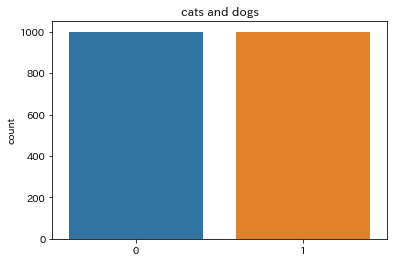

In [27]:
sns.countplot(labels)
plt.title('cats and dogs')

In [28]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10, 5))
    plt.imshow(pair)
    plt.show()

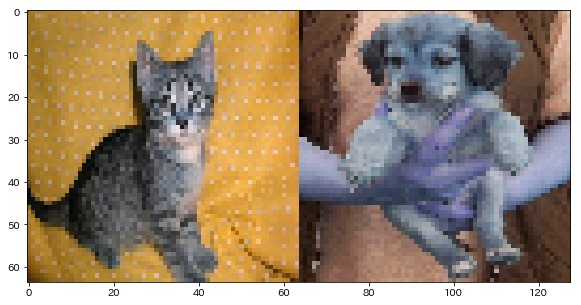

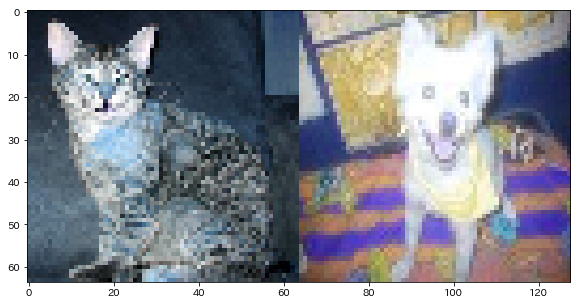

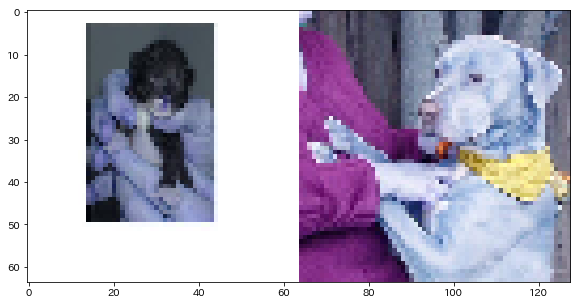

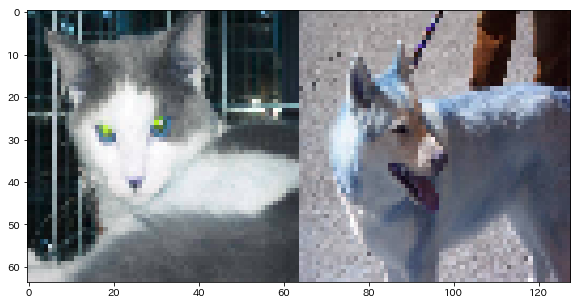

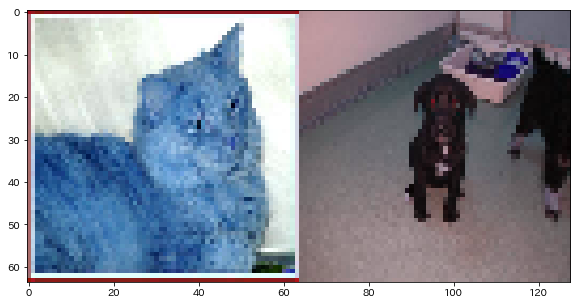

In [29]:
for idx in range(5):
    show_cats_and_dogs(idx)

In [30]:
train.shape

(2000, 3, 64, 64)

Text(0.5,1,'Your Average Dog')

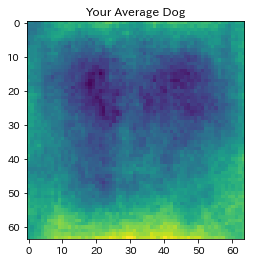

In [31]:
dog_ave = np.array([dog[0].T for i, dog in enumerate(train) if labels[i] ==1]).mean(axis=0)
plt.imshow(dog_ave)
plt.title("Your Average Dog")

Text(0.5,1,'Your Average Cat')

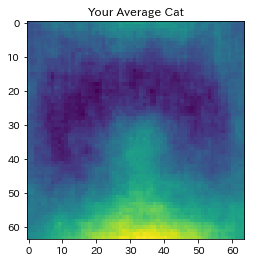

In [32]:
cat_ave = np.array([cat[0].T for i, cat in enumerate(train) if labels[i] ==0]).mean(axis=0)
plt.imshow(cat_ave)
plt.title("Your Average Cat")

In [33]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


In [40]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'

def catdog():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3),  padding='same', input_shape=(3,ROWS, COLS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(data_format="channels_first", pool_size=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model


model = catdog()

In [41]:
nb_epoch = 10
batch_size = 16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        

    
def run_catdog():
    
    history = LossHistory()
    model.fit(train, labels, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])
    

    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_catdog()

Epoch 00009: early stopping


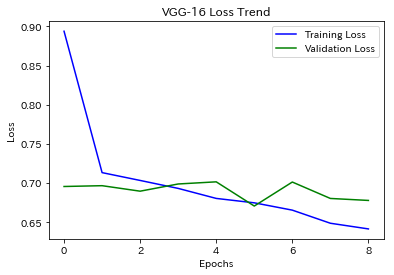

In [42]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

I am 62.27% sure this is a Dog


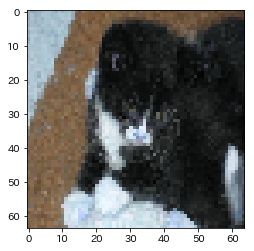

I am 52.93% sure this is a Cat


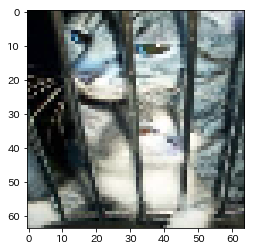

I am 66.91% sure this is a Dog


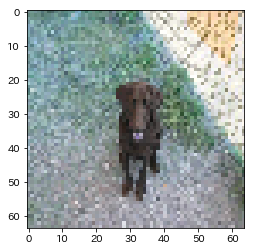

I am 67.01% sure this is a Dog


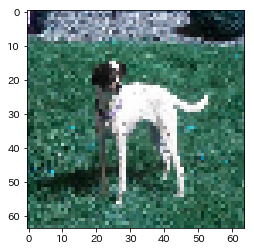

I am 66.63% sure this is a Dog


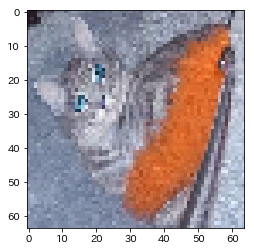

I am 71.85% sure this is a Dog


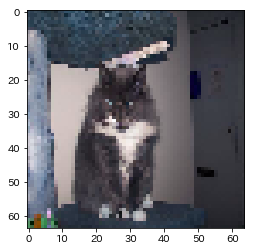

I am 66.98% sure this is a Dog


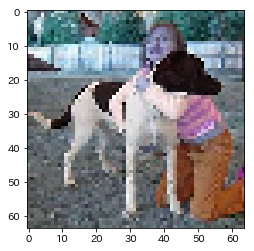

I am 83.01% sure this is a Dog


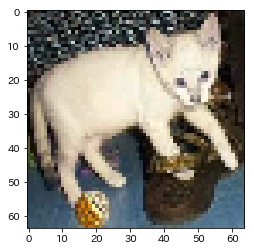

I am 69.69% sure this is a Dog


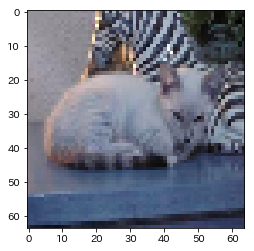

I am 63.20% sure this is a Cat


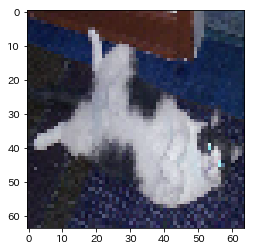

In [46]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test[i].T)
    plt.show()